## PRML Assigment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

C:\Users\Deena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading data
df1 = pd.read_csv(r"C:\Users\Deena\Downloads\breast+cancer\breast-cancer.data")

In [3]:
df1.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
# Function to convert range values to mean values
def range_mean(range_value):
    # Split the range value into lower and upper bounds
    lower, upper = map(int, range_value.split('-'))
    # Calculate the mean value
    mean_value = (lower + upper) / 2
    return mean_value

In [5]:
df1['age'] = df1['age'].apply(range_mean)
df1['tumor-size'] = df1['tumor-size'].apply(range_mean)
df1['inv-nodes'] = df1['inv-nodes'].apply(range_mean)

In [6]:
list1 = ['Class', 'menopause', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

def ft(col):
    df1[col] = label_encoder.fit_transform(df1[col])

# Transform the categorical variables
for i in list1:
    ft(i)

In [7]:
df1.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,2,32.0,1.0,1,2,0,2,0
1,0,44.5,2,22.0,1.0,1,1,1,5,0
2,0,44.5,2,22.0,1.0,1,1,0,2,0
3,0,64.5,0,17.0,1.0,1,1,1,3,0
4,0,44.5,2,2.0,1.0,1,1,1,4,0


In [8]:
df1.shape

(286, 10)

In [9]:
df1.dtypes

Class            int32
age            float64
menopause        int32
tumor-size     float64
inv-nodes      float64
node-caps        int32
deg-malig        int64
breast           int32
breast-quad      int32
irradiat         int32
dtype: object

In [10]:
df1.replace('?', np.nan, inplace=True)

In [11]:
df1.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [14]:
X = df1.iloc[:,1:]
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,34.5,2,32.0,1.0,1,2,0,2,0
1,44.5,2,22.0,1.0,1,1,1,5,0
2,44.5,2,22.0,1.0,1,1,0,2,0
3,64.5,0,17.0,1.0,1,1,1,3,0
4,44.5,2,2.0,1.0,1,1,1,4,0
...,...,...,...,...,...,...,...,...,...
281,34.5,2,32.0,1.0,1,1,0,3,0
282,34.5,2,22.0,1.0,1,2,0,3,1
283,64.5,0,22.0,1.0,1,0,1,3,0
284,44.5,0,32.0,4.0,1,2,0,2,0


In [15]:
Y = df1.iloc[:,0]
Y

0      0
1      0
2      0
3      0
4      0
      ..
281    1
282    1
283    1
284    1
285    1
Name: Class, Length: 286, dtype: int32

### Exercise 1: Implement a Support Vector Classifier

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [17]:
# SVC
svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

### Exercise 2: Implement Linear, Radial, Polynomial and Gaussian Kernel and compare their performances.

In [18]:
# for different kernels
kernel_score = {}

def svc_kernels(name):
    svc_k = SVC(kernel=name)
    svc_k.fit(x_train, y_train)
    predictions = svc_k.predict(x_test)
    score = svc_k.score(x_test, y_test)
    kernel_score[name] = score

In [19]:
svc_kernels('linear')
svc_kernels('poly')
svc_kernels('rbf')

In [20]:
kernel_score

{'linear': 0.6206896551724138,
 'poly': 0.603448275862069,
 'rbf': 0.603448275862069}

Text(0, 0.5, 'Score')

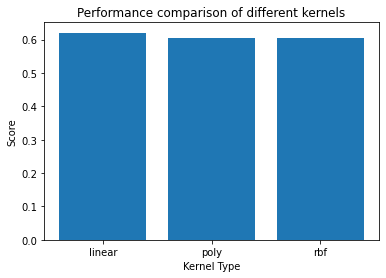

In [21]:
plt.bar(kernel_score.keys(), kernel_score.values())
plt.title("Performance comparison of different kernels")
plt.xlabel("Kernel Type")
plt.ylabel("Score")

### Exercise 3: Train the model and predict the response for test dataset.

In [22]:
svc_predictions = svc.predict(x_test)

### Exercise 4: Generate Confusion matrix

In [23]:
cnf = confusion_matrix(y_test, svc_predictions)
print("Confusion Matrix:")
print(cnf)

Confusion Matrix:
[[35  0]
 [23  0]]


<AxesSubplot:>

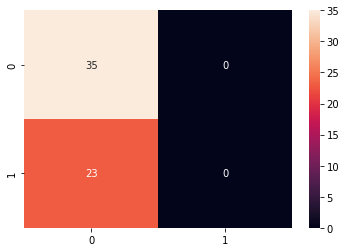

In [24]:
sns.heatmap(cnf, annot=True)

### Exercise 5: Implement KNN-Classifier, Logistic Regression and compare their performance with SVC “Accuracy, F1-Score, Precision and Recall”.

#### KNN Classifier, Logistic Regression

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
knn_predictions = knn.predict(x_test)
knn_score = knn.score(x_test,y_test)
knn_score

0.6206896551724138

In [27]:
# Logistic Regression
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [28]:
log_reg_predictions = log_reg.predict(x_test)
logreg_score = log_reg.score(x_test,y_test)
logreg_score

0.6379310344827587

In [29]:
# Calculate metrics
def performance(yt, y_pred):
    accuracy = accuracy_score(yt, y_pred)
    f1 = f1_score(yt, y_pred, average='weighted')
    precision = precision_score(yt, y_pred, average='weighted')
    recall = recall_score(yt, y_pred, average='weighted')
    return accuracy, f1, precision, recall

In [30]:
knn_list = []
log_list = []
svm_list = []

In [31]:
knn_list = performance(y_test, knn_predictions)
log_list = performance(y_test, log_reg_predictions)
svm_list = performance(y_test, svc_predictions)

C:\Users\Deena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


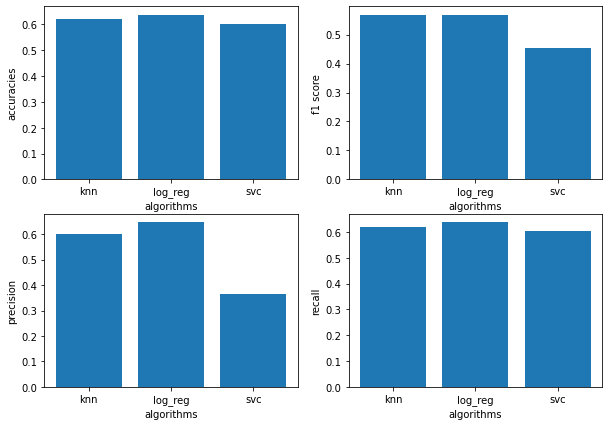

In [32]:
plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.bar(['knn', 'log_reg', 'svc'],[knn_list[0], log_list[0],svm_list[0]])
plt.xlabel('algorithms')
plt.ylabel('accuracies')

plt.subplot(2, 2, 2)
plt.bar(['knn', 'log_reg', 'svc'],[knn_list[1], log_list[1],svm_list[1]])
plt.xlabel('algorithms')
plt.ylabel('f1 score')

plt.subplot(2, 2, 3)
plt.bar(['knn', 'log_reg', 'svc'],[knn_list[2], log_list[2],svm_list[2]])
plt.xlabel('algorithms')
plt.ylabel('precision')

plt.subplot(2, 2, 4)
plt.bar(['knn', 'log_reg', 'svc'],[knn_list[3], log_list[3],svm_list[3]])
plt.xlabel('algorithms')
plt.ylabel('recall')
plt.show()

### Exercise 6: Perform Grid Search Method for Hyperparameter Tuning for SVC and KNN.

In [33]:
svc_pg = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [34]:
svc_grid_search = GridSearchCV(estimator=SVC(), param_grid=svc_pg, scoring='accuracy', cv=3)
svc_grid_search.fit(x_train, y_train)
best_svc = svc_grid_search.best_estimator_
print("Best SVC Hyperparameters:", best_svc)

Best SVC Hyperparameters: SVC(C=0.1, kernel='linear')


In [35]:
knn_pg = {'n_neighbors': [3, 5, 7]}

In [36]:
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_pg, scoring='accuracy', cv=3)
knn_grid_search.fit(x_train, y_train)
best_knn = knn_grid_search.best_estimator_
print("Best KNN Hyperparameters:", best_knn)

Best KNN Hyperparameters: KNeighborsClassifier(n_neighbors=7)


### Exercise 7: Generate ROC and Compare AUC for KNN and SVC. 

In [37]:
svc_probs = svc.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)

In [38]:
fpr1, tpr1, thresh1 = roc_curve(y_test, svc_probs[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_probs[:,1], pos_label=1)

In [39]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [40]:
# auc scores
svc_auc_score = roc_auc_score(y_test, svc_probs[:,1])
knn_auc_score = roc_auc_score(y_test, knn_probs[:,1])

print("AUC Score for SVM: ",svc_auc_score)
print("AUC Score for KNN: ",knn_auc_score)

AUC Score for SVM:  0.6161490683229813
AUC Score for KNN:  0.5652173913043479


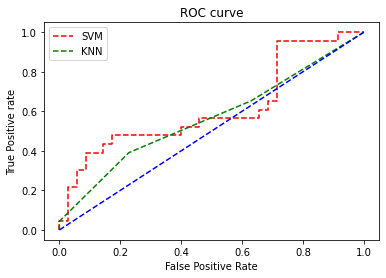

In [41]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()